Red Neuronal Convolucional (CNN)
Utilizando dataset Fashion MNIST para el entrenamiento y las predicciones.
Autor: Rafael Alberto Payan Urquidez

Comenzamos importando las librerías necesarias.

In [1]:
import tensorflow as tf
from tensorflow import keras
import numpy as np
import matplotlib.pyplot as plt

# Para tener en cuenta la versión de TensorFlow, debido a que la API de Keras ha cambiado
# en las versiones más recientes de TensorFlow y puede afectar al funcionamiento.
print(tf.__version__)

2.19.0


Cargamos el dataset Fashion MNIST

In [2]:
fashion_mnist = keras.datasets.fashion_mnist
(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

# Nombres de las clases para visualización
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

Preprocesamiento de los datos

In [3]:
# Normalizar los valores de los píxeles al rango [0, 1]
train_images = train_images / 255.0
test_images = test_images / 255.0

# Reshape de las imágenes para que incluyan la dimensión del canal (1 para escala de grises)
# (número_de_ejemplos, alto, ancho, canales)
train_images_reshaped = train_images.reshape(train_images.shape[0], 28, 28, 1)
test_images_reshaped = test_images.reshape(test_images.shape[0], 28, 28, 1)

print(f"Forma de las imágenes de entrenamiento para CNN: {train_images_reshaped.shape}")
print(f"Forma de las imágenes de prueba para CNN: {test_images_reshaped.shape}")

Forma de las imágenes de entrenamiento para CNN: (60000, 28, 28, 1)
Forma de las imágenes de prueba para CNN: (10000, 28, 28, 1)


Construir el modelo CNN

In [4]:
model_cnn = keras.Sequential([
    keras.layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)), # Primera capa convolucional
    keras.layers.MaxPooling2D((2, 2)), # Capa de pooling
    keras.layers.Conv2D(64, (3, 3), activation='relu'), # Segunda capa convolucional
    keras.layers.MaxPooling2D((2, 2)), # Segunda capa de pooling
    keras.layers.Flatten(), # Aplanar la salida de las capas convolucionales antes de las capas densas
    keras.layers.Dense(128, activation='relu'), # Capa densa (comúnmente llamada "fully connected")
    keras.layers.Dropout(0.2), # Dropout para regularización
    keras.layers.Dense(10, activation='softmax') # Capa de salida con 10 neuronas y activación softmax
])

c:\Users\rafau\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Compilar el modelo

In [5]:
model_cnn.compile(optimizer='adam',
                  loss='sparse_categorical_crossentropy',
                  metrics=['accuracy'])

model_cnn.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 26, 26, 32)     │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 13, 13, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 11, 11, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 5, 5, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 1600)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │       204,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 225,034 (879.04 KB)

 Trainable params: 225,034 (879.04 KB)

 Non-trainable params: 0 (0.00 B)

Entrenar el modelo

In [6]:
history_cnn = model_cnn.fit(train_images_reshaped, train_labels, epochs=10, validation_split=0.2)

Epoch 1/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 14s 8ms/step - accuracy: 0.7483 - loss: 0.7047 - val_accuracy: 0.8727 - val_loss: 0.3470
Epoch 2/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 12s 8ms/step - accuracy: 0.8777 - loss: 0.3381 - val_accuracy: 0.8882 - val_loss: 0.3049
Epoch 3/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 12s 8ms/step - accuracy: 0.8918 - loss: 0.2936 - val_accuracy: 0.9012 - val_loss: 0.2646
Epoch 4/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 12s 8ms/step - accuracy: 0.9068 - loss: 0.2529 - val_accuracy: 0.8989 - val_loss: 0.2760
Epoch 5/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 12s 8ms/step - accuracy: 0.9134 - loss: 0.2304 - val_accuracy: 0.9000 - val_loss: 0.2730
Epoch 6/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 12s 8ms/step - accuracy: 0.9268 - loss: 0.2024 - val_accuracy: 0.9083 - val_loss: 0.2507
Epoch 7/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 11s 8ms/step - accuracy: 0.9305 - loss: 0.1807 - val_accuracy: 0.9087 - val_loss: 0.2496
Epoch 8/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 11s 7ms/step - accuracy: 0.9367 - loss: 0

Evaluar el modelo

In [7]:
test_loss_cnn, test_acc_cnn = model_cnn.evaluate(test_images_reshaped, test_labels, verbose=2)
print(f'\nPrecisión en el conjunto de prueba (CNN): {test_acc_cnn:.4f}')

313/313 - 1s - 4ms/step - accuracy: 0.9103 - loss: 0.2851

Precisión en el conjunto de prueba (CNN): 0.9103


Visualizar el historial del entrenamiento

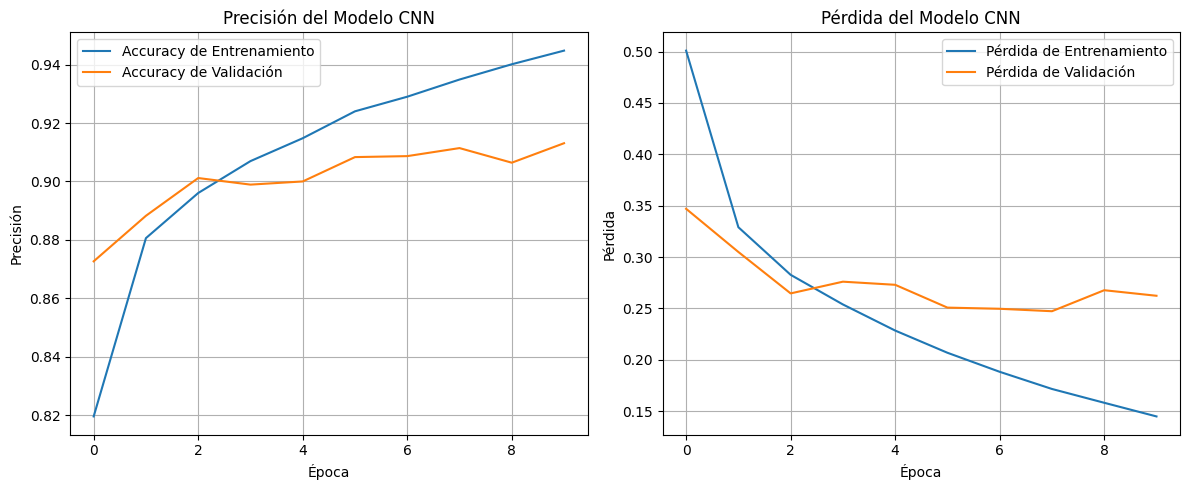

In [8]:
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.plot(history_cnn.history['accuracy'], label='Accuracy de Entrenamiento')
plt.plot(history_cnn.history['val_accuracy'], label='Accuracy de Validación')
plt.title('Precisión del Modelo CNN')
plt.xlabel('Época')
plt.ylabel('Precisión')
plt.legend()
plt.grid(True)

plt.subplot(1, 2, 2)
plt.plot(history_cnn.history['loss'], label='Pérdida de Entrenamiento')
plt.plot(history_cnn.history['val_loss'], label='Pérdida de Validación')
plt.title('Pérdida del Modelo CNN')
plt.xlabel('Época')
plt.ylabel('Pérdida')
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()

Realizar predicciones y visualizar algunas

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step


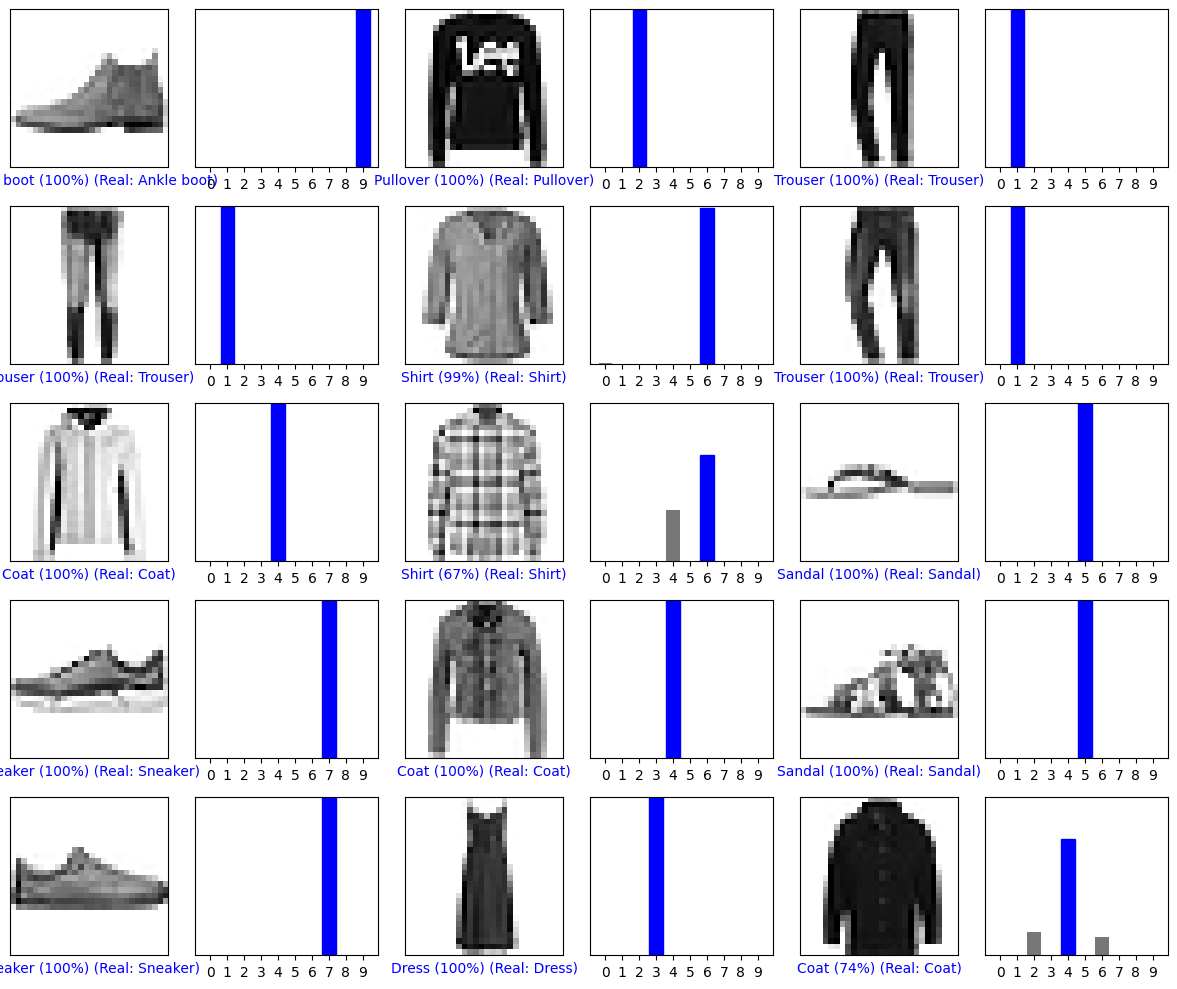

In [9]:
predictions_cnn = model_cnn.predict(test_images_reshaped)

def plot_image_prediction(i, predictions_array, true_label, img):
    true_label, img = true_label[i], img[i]
    plt.grid(False)
    plt.xticks([])
    plt.yticks([])

    plt.imshow(img.reshape(28, 28), cmap=plt.cm.binary) # Asegurarse de que la imagen sea 28x28

    predicted_label = np.argmax(predictions_array)
    if predicted_label == true_label:
        color = 'blue'
    else:
        color = 'red'

    plt.xlabel(f"{class_names[predicted_label]} ({100*np.max(predictions_array):.0f}%) (Real: {class_names[true_label]})",
               color=color)

def plot_value_array(i, predictions_array, true_label):
    true_label = true_label[i]
    plt.grid(False)
    plt.xticks(range(10))
    plt.yticks([])
    thisplot = plt.bar(range(10), predictions_array, color="#777777")
    plt.ylim([0, 1])
    predicted_label = np.argmax(predictions_array)

    thisplot[predicted_label].set_color('red')
    thisplot[true_label].set_color('blue')

num_rows = 5
num_cols = 3
num_images = num_rows * num_cols
plt.figure(figsize=(2 * 2 * num_cols, 2 * num_rows))
for i in range(num_images):
    plt.subplot(num_rows, 2 * num_cols, 2 * i + 1)
    plot_image_prediction(i, predictions_cnn[i], test_labels, test_images)
    plt.subplot(num_rows, 2 * num_cols, 2 * i + 2)
    plot_value_array(i, predictions_cnn[i], test_labels)
plt.tight_layout()
plt.show()